## About Dataset
### Context
Customer Personality Analysis involves a comprehensive examination of a company's ideal customers. This analysis aids businesses in gaining a better understanding of their customers, facilitating the customization of products based on the specific needs, behaviors, and concerns of different customer types.
By conducting customer personality analysis, businesses can tailor their products to target customers from various segments. For instance, instead of marketing a new product to every customer in the database, a company can identify the most likely customer segment to purchase the product and focus marketing efforts on that specific segment.

### Attributes
#### People
- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in the customer's household
- **Teenhome:** Number of teenagers in the customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since the customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- **MntWines:** Amount spent on wine in the last 2 years
- **MntFruits:** Amount spent on fruits in the last 2 years
- **MntMeatProducts:** Amount spent on meat in the last 2 years
- **MntFishProducts:** Amount spent on fish in the last 2 years
- **MntSweetProducts:** Amount spent on sweets in the last 2 years
- **MntGoldProds:** Amount spent on gold in the last 2 years

#### Promotion
- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to the company’s website in the last month

### Target
Clustering is required to summarize customer segments.

### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.


## 1. Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

## 2. Import data

In [103]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [104]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 3. Data Cleaning

In [105]:
df.shape

(2240, 29)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [107]:
df.duplicated().sum()

0

In [108]:
df.isna().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
                  ..
AcceptedCmp2       0
Complain           0
Z_CostContact      0
Z_Revenue          0
Response           0
Length: 29, dtype: int64

In [109]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


The dataframe contains some "errors" that I have to deal with before feature engineering stages:
- 24 missing values in column "Income"
- Column "Dt_Customer" is in dtype = 'object' with format = 'dd-mm-yyyy', not datetime64[ns]
- Education & Marital_Status are categorical columns

In [110]:
# Drop rows containing NaN values 
df = df.dropna()

In [111]:
# Convert Dt_Customer to datetime64[ns]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

print('Max date in the dataset:', max(df['Dt_Customer']))
print('Min date in the dataset:', min(df['Dt_Customer']))

Max date in the dataset: 2014-06-29 00:00:00
Min date in the dataset: 2012-07-30 00:00:00


In [112]:
# Calculate Customer's Active Days until 2024-01-10

## Declare today's date
today_date_str = '2024-01-10'
today_date = pd.to_datetime(today_date_str, format= '%Y-%m-%d')

## Calculate 'Customer_Active_Days' 
df['Customer_Active_Days'] = (today_date - df['Dt_Customer']).dt.days

In [113]:
plt.style.use('ggplot')

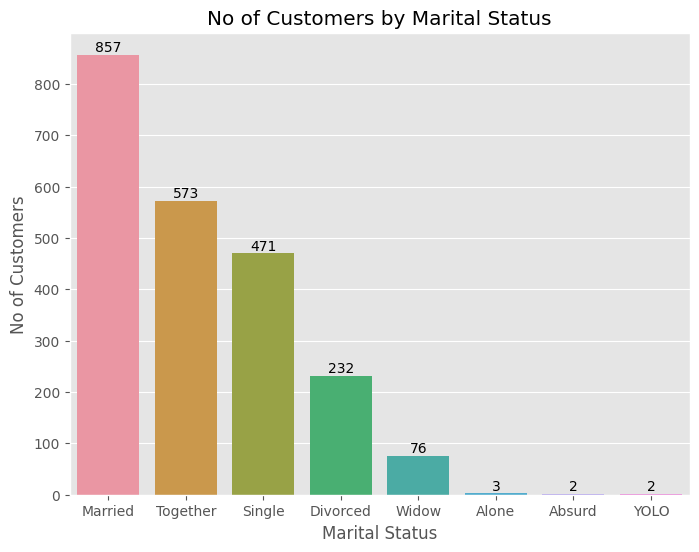

In [114]:
# Marital Status 
test_marital_status = df.groupby(by = 'Marital_Status'
                                 ,as_index = False)\
                        .agg(count = ('ID', 'count'))\
                        .sort_values(by = 'count', ascending=False)

plt.figure(figsize = (8,6))

ax = sns.barplot(data = test_marital_status
              ,x = 'Marital_Status'
              ,y = 'count')

plt.xlabel('Marital Status')
plt.ylabel('No of Customers')
plt.title('No of Customers by Marital Status')

for i in ax.containers:
    ax.bar_label(i, fmt = '%.0f')

plt.show()

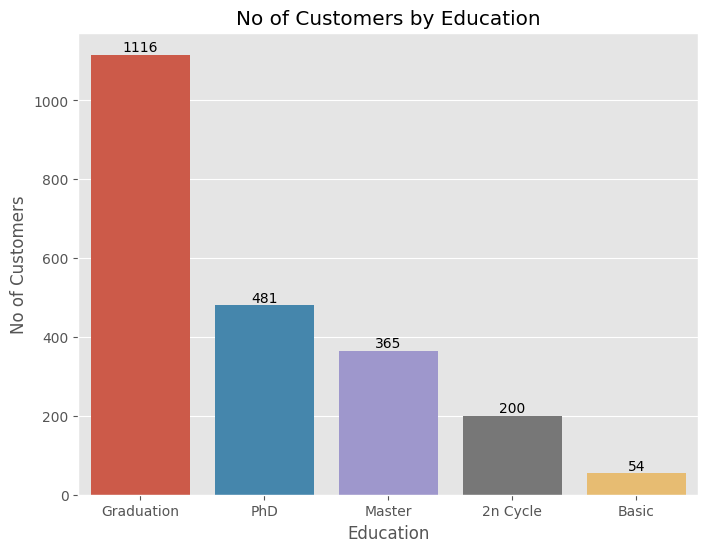

In [115]:
# Marital Status 
test_marital_status = df.groupby(by = 'Education'
                                 ,as_index = False)\
                        .agg(count = ('ID', 'count'))\
                        .sort_values(by = 'count', ascending=False)

plt.figure(figsize = (8,6))

ax = sns.barplot(data = test_marital_status
              ,x = 'Education'
              ,y = 'count')

plt.xlabel('Education')
plt.ylabel('No of Customers')
plt.title('No of Customers by Education')

for i in ax.containers:
    ax.bar_label(i, fmt = '%.0f')

plt.show()

## 4. Feature Engineering

In [116]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Active_Days'],
      dtype='object')

I will create new features based on existing columns:
- Total_Spent = Sum of ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
- Living_Situation = alone / not_alone
- Education_Level = undergraduate / graduate / postgraduate
- Total_Children = Sum of ['Kidhome', 'Teenhome']
- Is_Parent = IF Total_Children > 0, Yes (1) ELSE No (0)
- Age = 2024 - Year_Birth

In [117]:
print('Unique values of Marital_Status:', df['Marital_Status'].unique())
print('Unique values of Education:', df['Education'].unique())

Unique values of Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values of Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [118]:
# Ft. 1: Total_Spent
df['Total_Spent'] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + \
             df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Ft. 2: Living_Situation
df.loc[df['Marital_Status'].isin(['Together','Married']),'Living_Situation'] = 'alone'
df.loc[df['Marital_Status'].isin(['Single','Divorced','Widow','Alone','Absurd','YOLO']),'Living_Situation'] = 'not_alone'

# Ft. 3: Education_Level
df.loc[df['Education'].isin(['Graduation']),'Education_Level'] = 'undergraduate'
df.loc[df['Education'].isin(['Basic','2n Cycle']),'Education_Level'] = 'graduate'
df.loc[df['Education'].isin(['PhD','Master']),'Education_Level'] = 'postgraduate'

# Ft. 4: Total_Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Ft. 5: Is_Parent
df.loc[df['Total_Children'] > 0, 'Is_Parent'] = 1 #Yes
df.loc[df['Total_Children'] == 0, 'Is_Parent'] = 0 #No

# Ft. 6: Age
df['Age'] = 2024 - df['Year_Birth']

Now, I want to rename & remove some columns

In [119]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Active_Days', 'Total_Spent', 'Living_Situation',
       'Education_Level', 'Total_Children', 'Is_Parent', 'Age'],
      dtype='object')

In [120]:
drop_cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df =  df.drop(drop_cols, axis = 1)

In [121]:
df.columns = ['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency'
              , 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet','Gold'
              ,'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
              ,'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'
              , 'Complain', 'Response', 'Customer_Active_Days'
              ,'Total_Spent', 'Living_Situation', 'Education_Level', 'Total_Children','Is_Parent', 'Age']

In [122]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Active_Days,Total_Spent,Total_Children,Is_Parent,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,3835.521209,607.075361,0.947202,0.714350,55.179603
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,202.434667,602.900476,0.749062,0.451825,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3482.000000,5.000000,0.000000,0.000000,28.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3662.000000,69.000000,0.000000,0.000000,47.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3837.500000,396.500000,1.000000,1.000000,54.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4011.000000,1048.000000,1.000000,1.000000,65.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4181.000000,2525.000000,3.000000,1.000000,131.000000


### Plotting some info

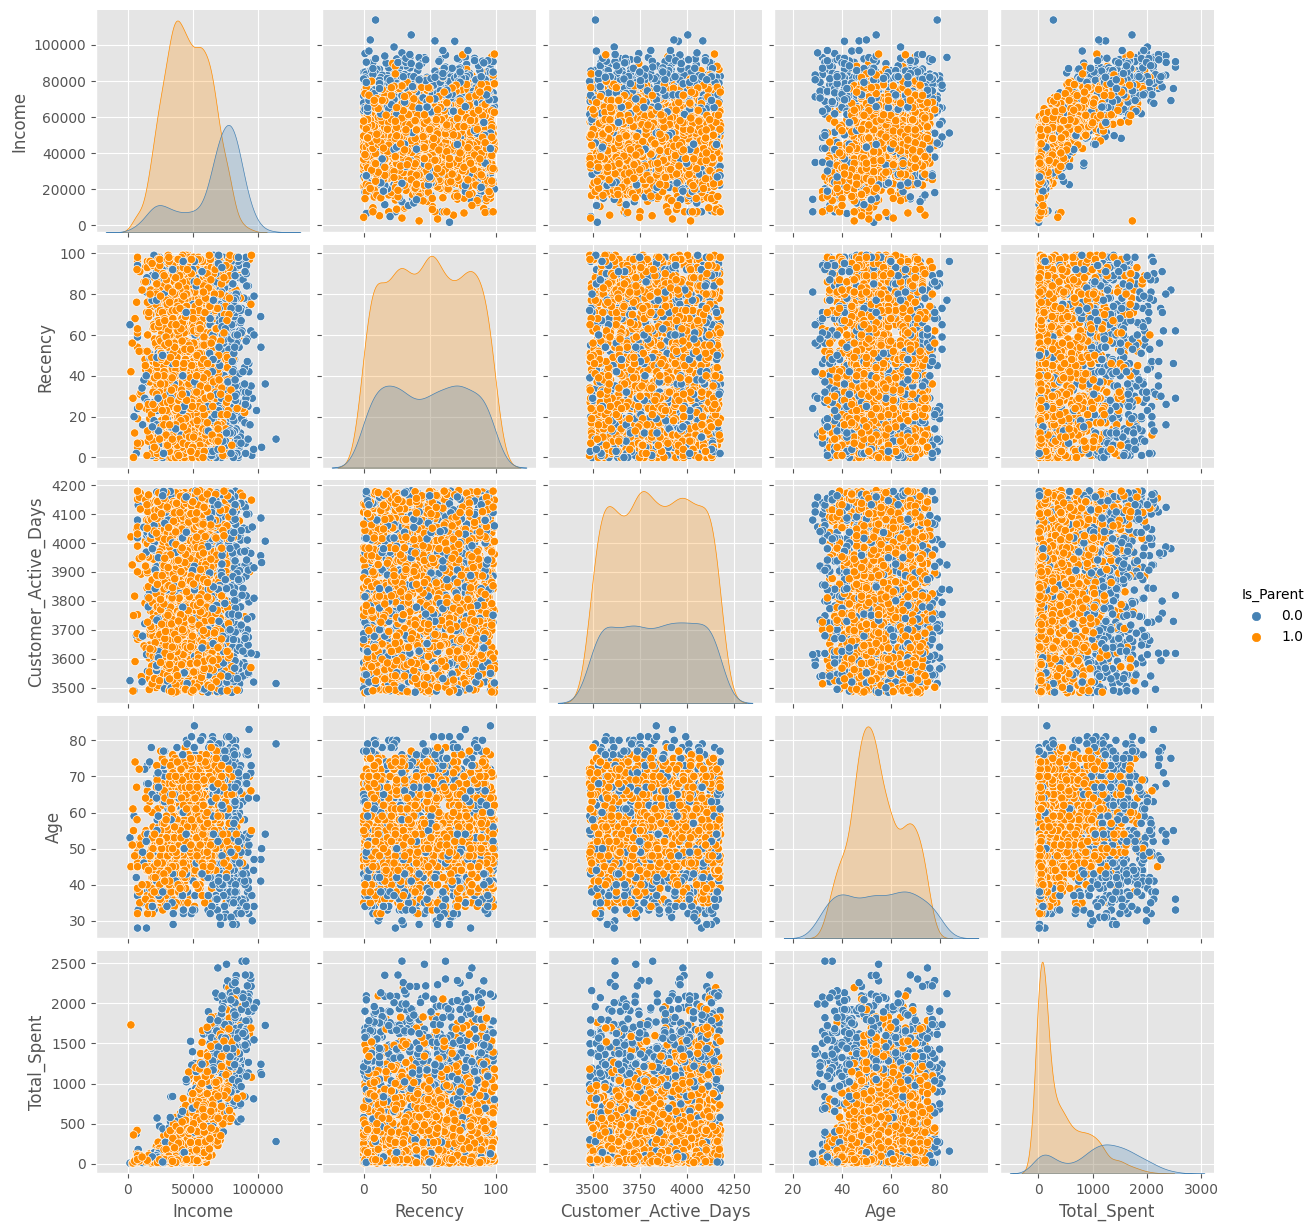

In [160]:
plotting_cols = [ "Income", "Recency", "Customer_Active_Days", "Age", "Total_Spent", "Is_Parent"]

sns.pairplot(data = df[plotting_cols]
             , hue = 'Is_Parent'
             , palette= (['steelblue','darkorange'])
)
plt.show()

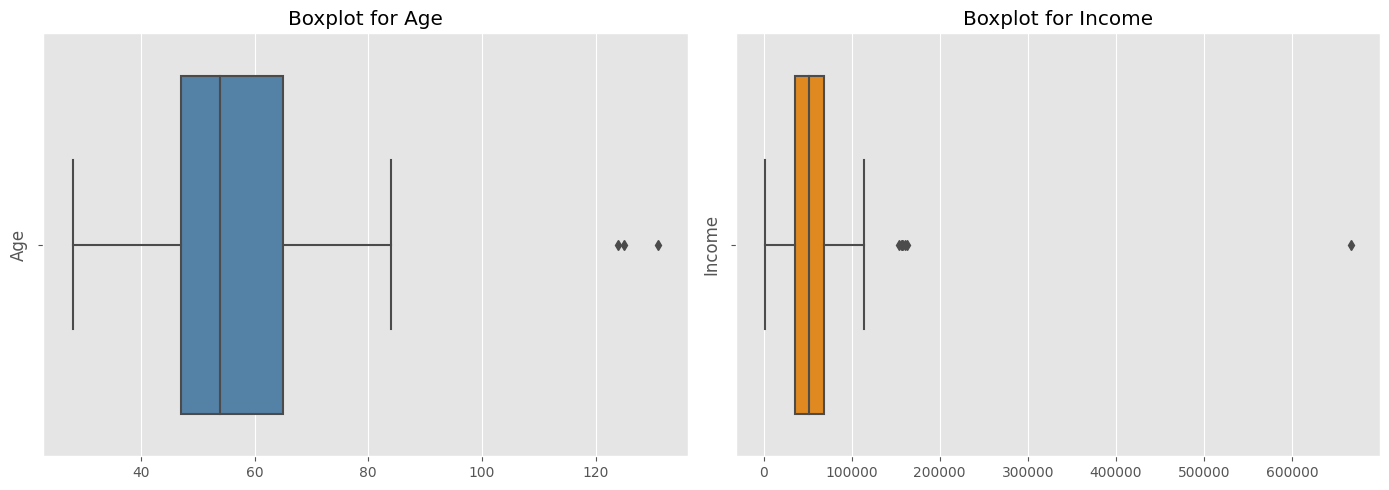

In [124]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize = (14,5))

# Boxplot for Age
sns.boxplot(data=df, x='Age', ax=axes[0], color = 'steelblue')
axes[0].set_title('Boxplot for Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('')

# Boxplot for 'Income'
sns.boxplot(data=df, x='Income', ax=axes[1], color = 'darkorange')
axes[1].set_title('Boxplot for Income')
axes[1].set_ylabel('Income')
axes[1].set_xlabel('')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

It can be clearly seen that there are some outliers in Age and Income. I will remove outliers base on IQR rules

In [125]:
# Calculate upper/lower bound for age
q1_age = np.percentile(df['Age'], 25)
q2_age = np.percentile(df['Age'], 50)
q3_age = np.percentile(df['Age'], 75)
iqr_age = q3_age - q1_age
upper_bound_age = iqr_age + 1.5*q3_age
lower_bound_age = iqr_age - 1.5*q1_age

# Calculate upper/lower bound for income
q1_income = np.percentile(df['Income'], 25)
q2_income = np.percentile(df['Income'], 50)
q3_income = np.percentile(df['Income'], 75)
iqr_income = q3_income - q1_income
upper_bound_income = iqr_income + 1.5*q3_income
lower_bound_income = iqr_income - 1.5*q1_income

In [126]:
print('Bounds for age from', lower_bound_age, 'to', upper_bound_age)
print('Bounds for income from', lower_bound_income, 'to', upper_bound_income)

Bounds for age from -52.5 to 115.5
Bounds for income from -19735.5 to 136002.0


In [127]:
#Remove Outliers
df = df[(df['Age'].between(lower_bound_age,upper_bound_age))&(df['Income'].between(lower_bound_income, upper_bound_income))]

Text(0.5, 1.0, 'Correlation Heatmap')

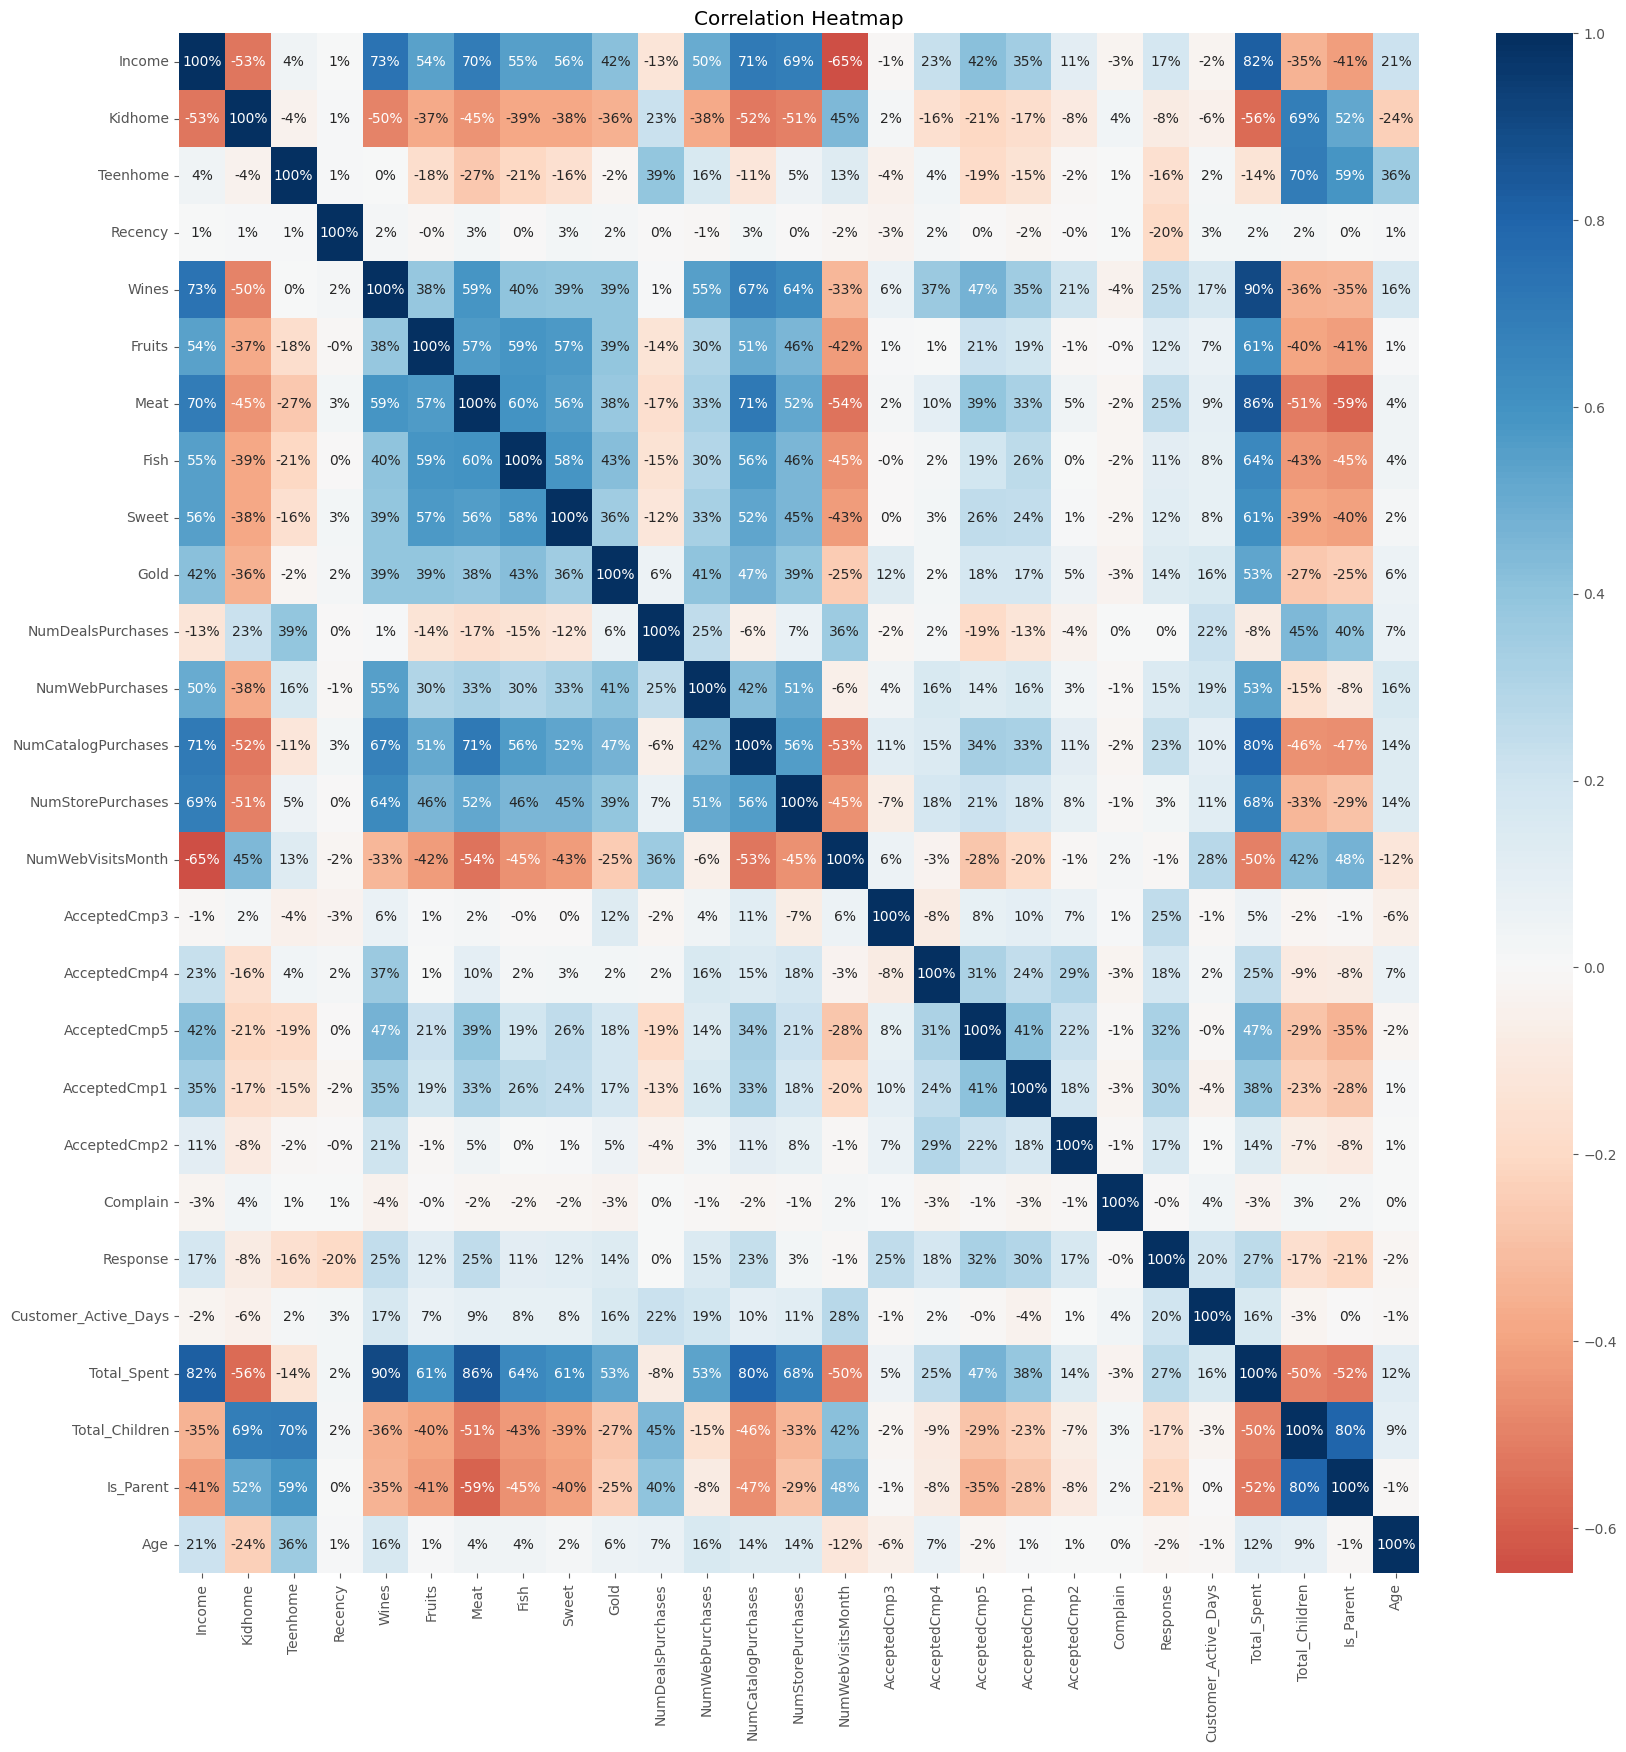

In [128]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix
            , annot=True
            , cmap= 'RdBu'
            , center=0
            , fmt = '.0%')
plt.title('Correlation Heatmap')

Quite good now. Let's move to next stages.

## 5. PreProcessing Data

In this stage, I will go across some steps:
- Label Encoding
- Data Scaling
- Dimension Reduction

In [129]:
obj =  (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print('Categorical columns:', object_cols)

Categorical columns: ['Education', 'Living_Situation', 'Education_Level']


In [130]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print('LabelEncoded categorical columns')
print('Sample after LabelEncoding:')
df[object_cols].head()

LabelEncoded categorical columns
Sample after LabelEncoding:


,Education,Living_Situation,Education_Level
0,2,1,2
1,2,1,2
2,2,0,2
3,2,0,2
4,4,0,1


In [131]:
# Create a new df, removing unnecessity columns
dropping_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

input_df = df.copy()
input_df = df.drop(dropping_cols, axis = 1)
input_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Active_Days,Total_Spent,Living_Situation,Education_Level,Total_Children,Is_Parent,Age
0,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,4145,1617,1,2,0,0.0,67
1,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,3595,27,1,2,2,1.0,70
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,3794,776,0,2,0,0.0,59
3,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,3621,53,0,2,1,1.0,40
4,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,3643,422,0,1,1,1.0,43


In [132]:
scaler = StandardScaler()
scaler.fit(input_df)
scaled_df = pd.DataFrame(scaler.transform(input_df)
                         ,columns= input_df.columns )
print('The dataset is scaled')

The dataset is scaled


In [133]:
print('The dataframe is being used for clustering:')
scaled_df.head()

The dataframe is being used for clustering:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Active_Days,Total_Spent,Living_Situation,Education_Level,Total_Children,Is_Parent,Age
0,-0.350162,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.527183,1.679323,1.347625,0.892338,-1.266589,-1.58466,1.017189
1,-0.350162,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-1.188629,-0.963897,1.347625,0.892338,1.403420,0.63105,1.273530
2,-0.350162,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.205999,0.281242,-0.742046,0.892338,-1.266589,-1.58466,0.333612
3,-0.350162,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.060245,-0.920675,-0.742046,0.892338,0.068415,0.63105,-1.289883
4,1.432997,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.951612,-0.307248,-0.742046,-0.571654,0.068415,0.63105,-1.033542


## 6. Customer Segmentation & Dimension Reduction using KMeans & PCA

In [134]:
scaled_df.shape

(2205, 23)

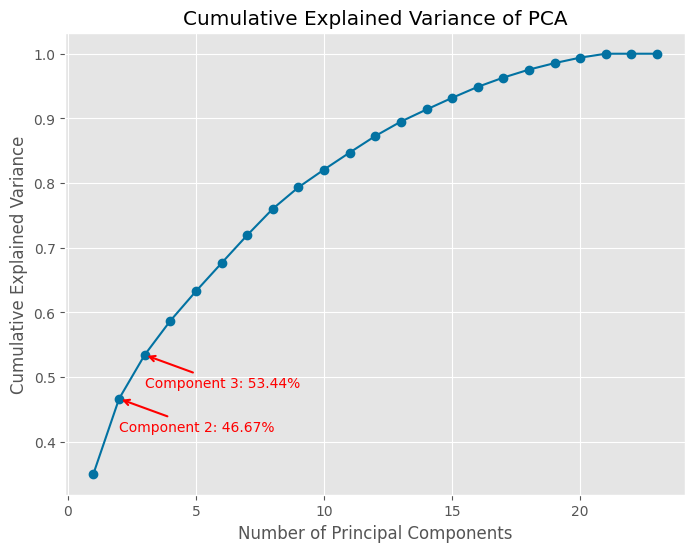

In [135]:
plt.style.use('ggplot')

pca = PCA()
X_pca = pca.fit_transform(scaled_df)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance,
         marker='o',
         linestyle='-',
         color='b')
plt.title('Cumulative Explained Variance of PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

plt.annotate(f'Component 2: {cumulative_explained_variance[1]*100:.2f}%',
             xy=(2, cumulative_explained_variance[1]),
             xytext=(2, cumulative_explained_variance[1] - 0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5, color='red'),
             color='red'
             )

plt.annotate(f'Component 3: {cumulative_explained_variance[2]*100:.2f}%',
             xy=(3, cumulative_explained_variance[2]),
             xytext=(3, cumulative_explained_variance[2] - 0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5, color='red'),
             color='red'
             )

plt.show()

As we see, the less Principal Components (Dimensions) the less explained proportion they can "explained"  
But for this project, I want to use
- Case 1: 2 Components (46.6%)
- Case 2: 3 Components (53.4%) 

for better visualization

### Case 1: 2-Dimensional Reduction

In [136]:
# Reduce dimensions
pca_2dim = PCA(n_components=2)
X_pca_2dim = pca_2dim.fit_transform(scaled_df)
X_pca_2dim

array([[ 4.73441079,  0.03054091],
       [-2.8454256 ,  0.21417706],
       [ 2.51564524, -0.88503381],
       ...,
       [ 2.26837809, -1.48919451],
       [ 1.73772703,  1.38142677],
       [-2.37035754,  1.6602644 ]])

In [137]:
PCA_df_2dim = pd.DataFrame(pca_2dim.transform(scaled_df), columns=(["dim1","dim2"]))
PCA_df_2dim.describe().T

,count,mean,std,min,25%,50%,75%,max
dim1,2205.0,-3.866899e-17,2.840896,-5.760323,-2.599114,-0.816927,2.418279,7.585182
dim2,2205.0,2.577933e-17,1.633258,-3.892436,-1.330662,-0.190427,1.240251,5.770282


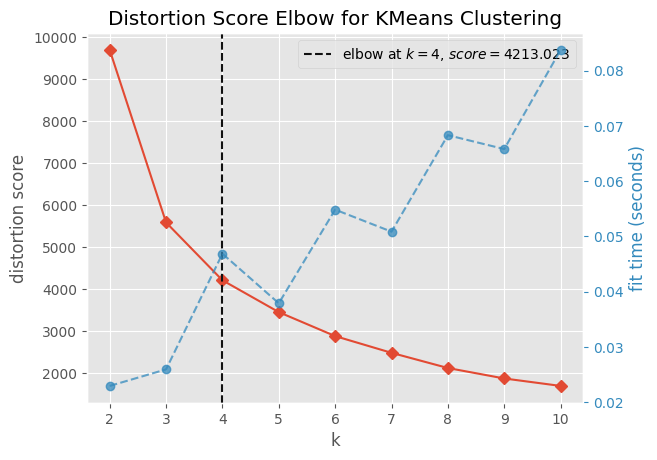

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [138]:
plt.style.use('ggplot')
elbow_2dim = KElbowVisualizer(KMeans(n_init = 10, random_state=42), k=10)
elbow_2dim.fit(PCA_df_2dim)
elbow_2dim.show()

In [139]:
# Apply K-Means clustering
kmeans_2dim = KMeans(n_clusters=4, random_state=42, n_init= 10)
clusters_2dim = kmeans_2dim.fit_predict(X_pca_2dim)

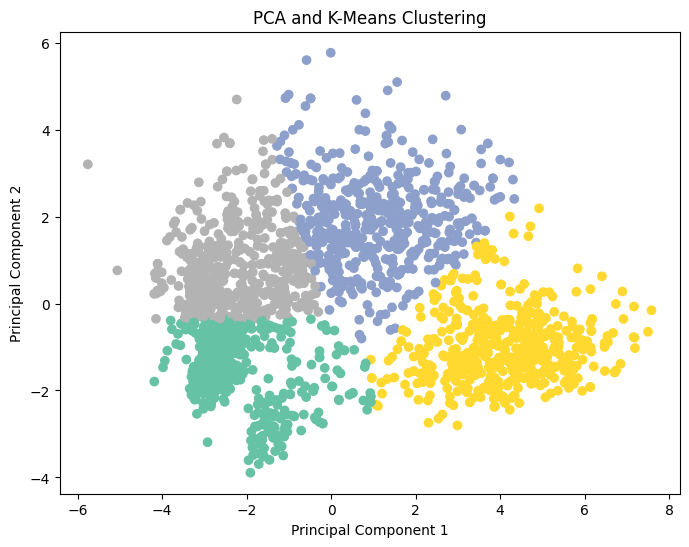

In [140]:
plt.style.use('default')

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2dim[:, 0], X_pca_2dim[:, 1], c=clusters_2dim, cmap='Set2_r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering')
plt.show()

### Case 2: 3-Dimensional Reduction

In [141]:
# Reduce dimensions
pca_3dim = PCA(n_components=3)
X_pca_3dim = pca_3dim.fit_transform(scaled_df)
X_pca_3dim

array([[ 4.73439826,  0.03007965,  2.10563455],
       [-2.84542612,  0.21416395, -1.69430316],
       [ 2.51565788, -0.88420837, -0.19477214],
       ...,
       [ 2.26838646, -1.488945  , -0.19786877],
       [ 1.73773003,  1.38154378, -1.73797394],
       [-2.37035515,  1.66035678, -0.57820596]])

In [142]:
PCA_df_3dim = pd.DataFrame(pca_3dim.transform(scaled_df), columns=(["dim1","dim2","dim3"]))
PCA_df_3dim.describe().T

,count,mean,std,min,25%,50%,75%,max
dim1,2205.0,-5.800349e-17,2.840896,-5.760325,-2.599114,-0.816927,2.418278,7.585182
dim2,2205.0,6.444832e-17,1.633258,-3.892487,-1.330510,-0.190453,1.240322,5.770226
dim3,2205.0,1.127846e-17,1.248647,-3.466472,-0.828173,0.011799,0.812447,5.408540


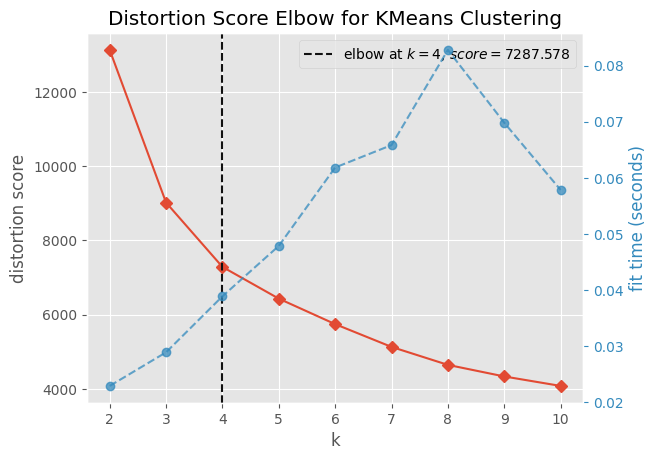

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
plt.style.use('ggplot')

elbow_3dim = KElbowVisualizer(KMeans(n_init = 10, random_state=42), k=10)
elbow_3dim.fit(PCA_df_3dim)
elbow_3dim.show()

In [144]:
# Apply K-Means clustering
kmeans_3dim = KMeans(n_clusters=4, random_state=42, n_init= 10)
clusters_3dim = kmeans_3dim.fit_predict(X_pca_3dim)

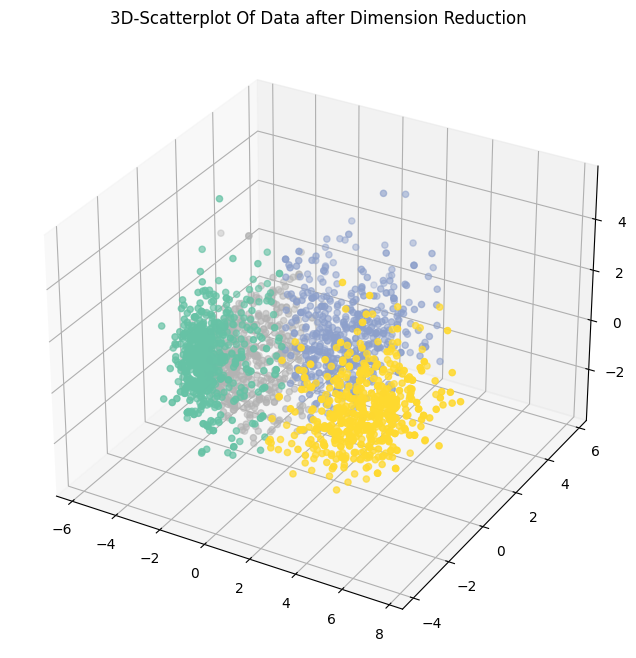

In [145]:
plt.style.use('default')

x = PCA_df_3dim['dim1']
y = PCA_df_3dim['dim2']
z = PCA_df_3dim['dim3']

#Plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111
                     , projection='3d')
ax.scatter(x,y,z
           , c= clusters_3dim
           , cmap = 'Set2_r'
           , marker = 'o')
ax.set_title('3D-Scatterplot Of Data after Dimension Reduction')
plt.show()

I will choose PCA_df_3dim for my clustering result

In [146]:
df['Cluster'] = kmeans_3dim.labels_

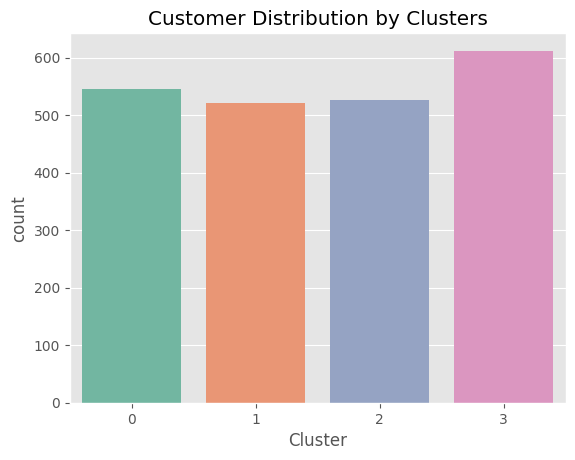

In [147]:
df_cluster_count = df.groupby(by = 'Cluster',as_index = False).agg(count = ('Cluster','count')).sort_values(by = 'Cluster',ascending=True)

plt.style.use('ggplot')

sns.barplot(data = df_cluster_count
            ,x = 'Cluster'
            ,y = 'count'
            ,palette='Set2')

plt.title('Customer Distribution by Clusters')
plt.show()

No of Customers between Clusters are fairly equal

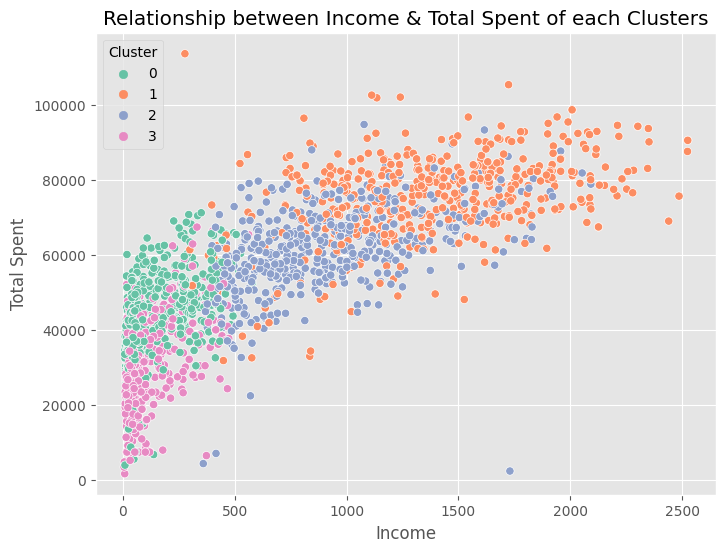

In [148]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df
                , y = 'Income'
                , x = 'Total_Spent'
                , hue = 'Cluster'
                , palette= 'Set2')

plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Relationship between Income & Total Spent of each Clusters')

plt.show()

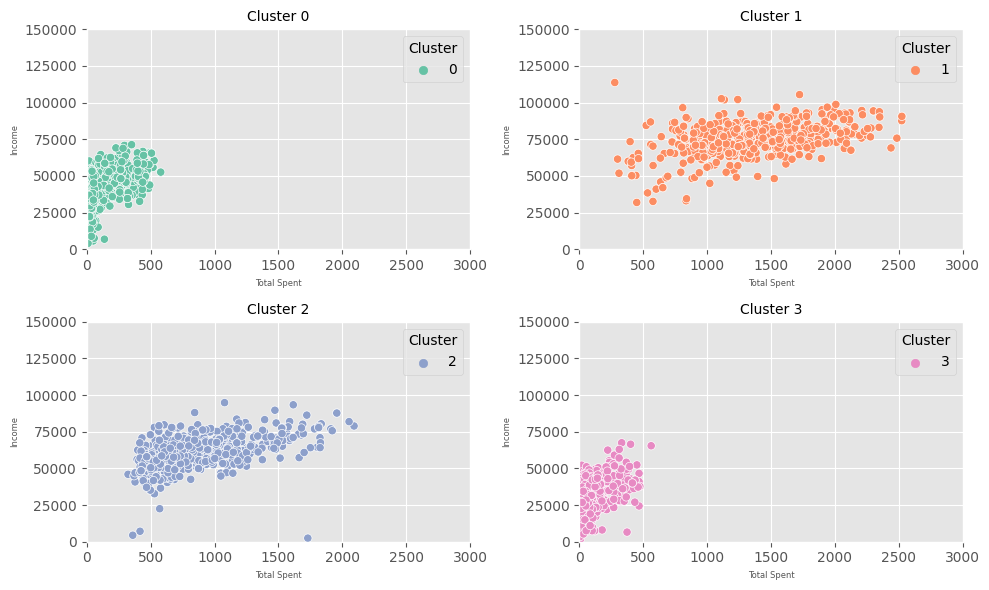

In [149]:
custom_palette = sns.color_palette("Set2", n_colors=len(df['Cluster'].unique()))

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, cluster in enumerate(sorted(df['Cluster'].unique())):
    row, col = divmod(i, 2)
    sns.scatterplot(data=df[df['Cluster'] == cluster], y='Income', x='Total_Spent', hue='Cluster', palette=[custom_palette[cluster]], ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}',size = 10)
    axes[row, col].set_ylabel('Income',size = 6 )
    axes[row, col].set_xlabel('Total Spent', size = 6)
    axes[row, col].set_ylim(0, 150000)
    axes[row, col].set_xlim(0, 3000)

plt.tight_layout()
plt.show()

Demographics:
- Cluster 0: Low Spent, Average Income
- Cluster 1: High Spent, High Income <b>(Best Targeted Customers)</b>
- Cluster 2: Average Spent, Average Income <b> (Potential Targeted Customers) </b>
- Cluster 3: Low Spent, Low Income

In [150]:
df['Total_Promotion_Accepted'] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

print('Range of Total_Promotion_Accepted: ', df['Total_Promotion_Accepted'].unique())

Range of Total_Promotion_Accepted:  [0 1 2 3 4]


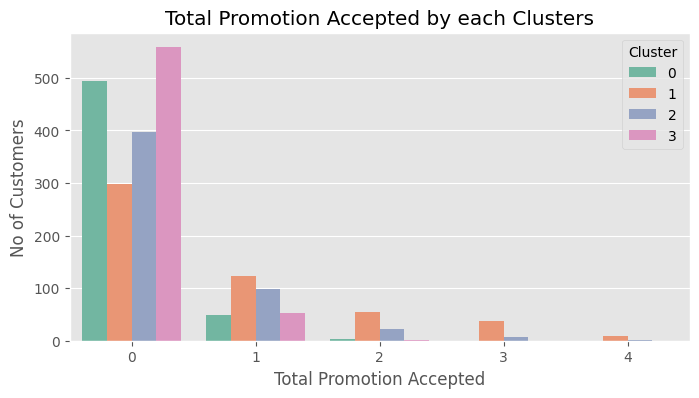

In [155]:
df_promotion_count = df.groupby(by = ['Cluster','Total_Promotion_Accepted'],as_index = False).agg(count = ('Total_Promotion_Accepted','count')).sort_values(by = 'Cluster',ascending=True)

plt.figure(figsize=(8,4))

sns.barplot(data = df_promotion_count
            ,x = 'Total_Promotion_Accepted'
            ,y = 'count'
            ,hue = 'Cluster'
            ,palette='Set2')

plt.xlabel('Total Promotion Accepted')
plt.ylabel('No of Customers')
plt.title('Total Promotion Accepted by each Clusters')
plt.legend(title = 'Cluster', loc = 'upper right')
plt.show()

It can be clearly seen that:
- The marketing campaigns are not really effective
- Not so many customers in the targeted leads after all. 
> The marketing campaigns must be revised and well-planned to have increase CR (Conversion Rate) for better selling performance

## 7. Customer Profiling

I will find Customer Profile by 2 type of identity: 
- Identity 1: ['Kidhome', 'Teenhome', 'Living_Situation', 'Education_Level', 'Total_Children', 'Is_Parent']
- Identity 2: ['Customer_Active_Days', 'Age']

### Identity 1: ['Kidhome', 'Teenhome', 'Living_Situation', 'Education_Level', 'Total_Children', 'Is_Parent']

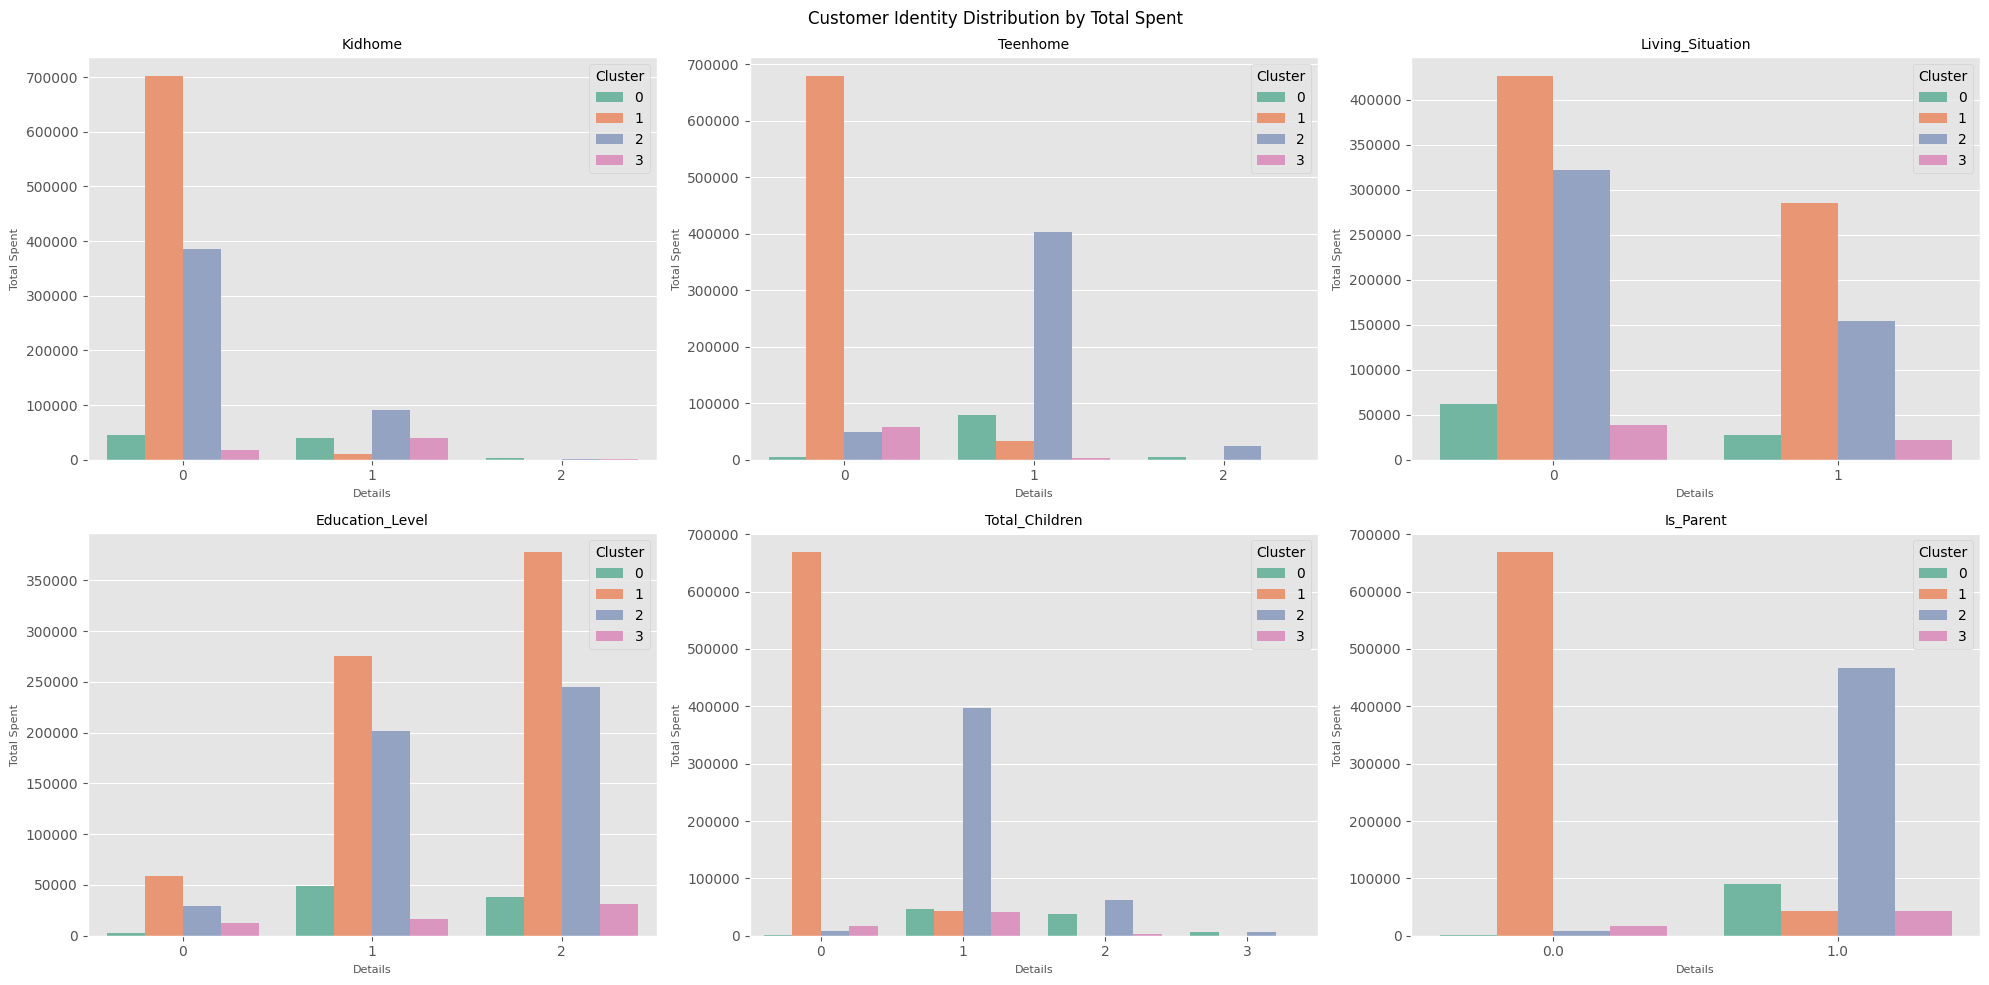

In [152]:
customer_identity1 = ['Kidhome', 'Teenhome', 'Living_Situation',
                      'Education_Level', 'Total_Children', 'Is_Parent']

fig, axes = plt.subplots(nrows=2, ncols= 3, figsize=(20, 10))

for i, feature in enumerate(customer_identity1):
    df_identity = df.groupby(by=['Cluster', feature], as_index=False).agg(Total_Spent=('Total_Spent', 'sum'))

    sns.barplot(data=df_identity, x=feature, y='Total_Spent', hue='Cluster', palette='Set2', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(feature, size = 10)
    axes[i // 3, i % 3].set_xlabel('Details', size = 8)
    axes[i // 3, i % 3].set_ylabel('Total Spent',size = 8)
    axes[i // 3, i % 3].legend(loc = 'upper right', title = 'Cluster')

plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

Add on Identity 1:
- Cluster 0 : Most of them are Parents and have 1 little kid or 1 teenager
- Cluster 1 : Most of them are Single OR Young Couples & not having children yet
- Cluster 2 : Parents, have childrens (most of their children are teenagers)
- Cluster 3 : Most of them are Young Parents, have childrens (most of their children are kids)

### Identity 2: ['Customer_Active_Days', 'Age']

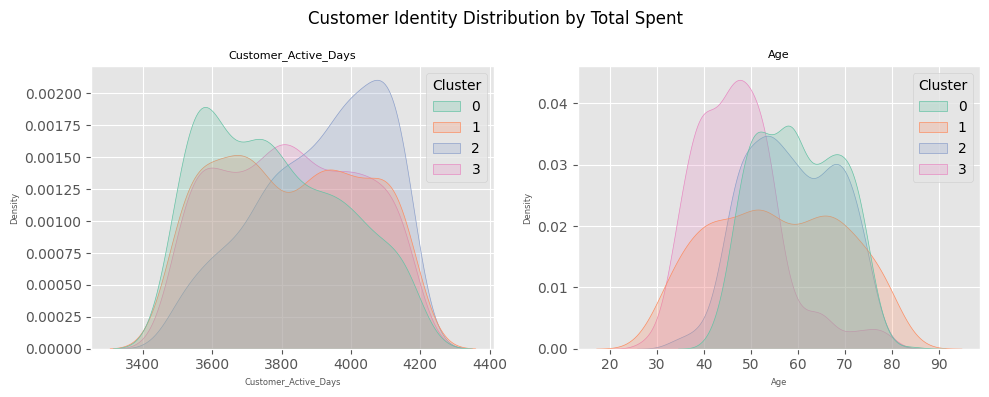

In [153]:
customer_identity2 = ['Customer_Active_Days', 'Age']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, feature in enumerate(customer_identity2):
    sns.kdeplot(data=df, x=feature, hue='Cluster', palette='Set2', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(feature, size = 8)
    axes[i].set_xlabel(feature, size = 6)
    axes[i].set_ylabel('Density',size = 6)

plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()


Add on Identity 2:
- Cluster 0 : Older
- Cluster 1 : All ages
- Cluster 2 : Older
- Cluster 3 : Younger

## 8. Conclusion

Currently, the marketing campaigns are not effective yet. The marketing team has to revise and improve them. One of the most efficiency ways for better CR rate for marketing campaigns is to base on customer's demographics & customer's profile.  

In the end, I found out the Profile for each type of Customers. Details as below:

> Cluster 0: 
+ Most of them are Parents and have 1 little kid or 1 teenager
+ Older
+ Average Income
+ Low Spent
> Cluster 1: <b>(Best Targeted Customers)</b>
+ Most of them are Single OR Couples & not having children yet
+ All ages
+ High Spent
+ High Income
> Cluster 2: <b> (Potential Targeted Customers) </b>
+ Parents, have childrens (most of their children are teenagers)
+ Older
+ Average Spent
+ Average Income
> Cluster 3:
+ Most of them are Parents, have childrens (most of their children are kids)
+ Younger
+ Low Spent
+ Low Income

## THE END 🤗